Likelihood
-----
<br>
<center><img src="images/100.png" height="500"/></center>

By The End Of This Session You Should Be Able To:
----

- Explain the difference the difference between the likelihood function and the probability function
- Write out the likelihood function for a given set of data and an assumed distribution
- Calculate the Maximum Likelihood estimation (MLE) by maximizing the log-likelihood

What is the difference between probability and likelihood?
----

Probability is used __before__ data are available to describe __possible future__ outcomes given a fixed value for the parameter (or parameter vector). 

P(Outcome|θ)

-----

Likelihood is used __after__ data are available to describe a function of a __parameter for a given outcome__.

L(θ|Outcome)

Statistical Inference
-----

<center><img src="images/inference.png" width="500"/></center>

The process of using emperical data to estimate the probability distribution that generated the data.

Inference is the ❤️ of Machine Learning
-----

<center><img src="images/inference2.png" width="500"/></center>

Applied Machine Learning is writing programs that learn from data.

We are going to "learn" / estimate the population parameter from data.

4 Types of Inference
-----

1. Point estimation
2. Hypothesis testing
3. Confidence intervals
4. Distrubtion Estimation

1. Point estimation
-------

<center><img src="https://www.cliffsnotes.com/assets/267186.png" height="500"/></center>

Provide a single "best guess" of some quantity of interest

2. Hypothesis testing
-----

<center><img src="https://brainmass.com/hubsimg/1429860/HypothesisTesting.jpg" height="500"/></center>

Start with some default idea, ask if the data provide sufficient evidence to reject the idea.

3. Confidence intervals (this is the best one)
-----

<center><img src="http://cdn.app.compendium.com/uploads/user/458939f4-fe08-4dbc-b271-efca0f5a2682/742d7708-efd3-492c-abff-6044d78e3bbd/Image/a9bd1376510c8289a0daf15f5bcd376f/ci.gif" height="500"/></center>

Provide an interval estimate of some quantity of interest

4. Distrubtion Estimation (the best one 🏆)
-----
<br>
<center><img src="https://i.ytimg.com/vi/iaq-MYLRk4k/maxresdefault.jpg" width="500"/></center>

Estimation Example
----

<br>
<center><img src="https://izbicki.me/img/uploads/2011/11/coins-all.jpg" height="500"/></center>

If we are given a coin, without knowing whether or not it is fair, how do we esitmate the true probability of getting a head when it is flipped?  



I flipped my coin 10 times, and got 8 heads. How can I estimate the probablity of success (getting a head) from the data?

Check for understanding
------

Before we carried out the experiment, did we know anything about the probability of getting a head?

We know that most of the coins are fair.  

Getting 8 heads out of 10 coin flips can be due to chance, and the coin is probably still close to fair.  

How do we incorporate this prior knowledge into our estimation?  

Answer: Go Bayesian!  

Bayesian statistics combines our knowledge and/or belief with what the data tell us to make inference about the quantity of interest.

We call the prior knowledge/belief the prior distribution: f(p)  



The data give us the likelihood of p: L(p)  



Our combined information about p is called the posterior distribution: f(p | x)  



We get the posterior by multiplying the prior and the likelihood:

f(p | x) ∝ f(p) L(p) 

What is another name for Likelihood distribution?

__measurement model__

<center><img src="images/bayes.png" style="width: 550px;"/></center>

Let $X$ be the number of heads we get from flipping the coin 10 times, then

$$X \sim Binomial(n = 10, p = ?)$$

In this case, the value of X is known, X  = 8, but p is unknown and we want to estimate it.

We may guess p = 8/10 = 0.8, but can it be 0.7? 0.9? 0.5? What's the most *likely* value of p for your coin?

Suppose for a moment that $p = 0.5$, what is the probability of observing $X = 8$?

When $X \sim Binomial(10, 0.5)$, 

$$ P(X = 8) = \binom{10}{8} (0.5)^8 (1 - 0.5)^{10 - 8} = 0.044 $$

In [1]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html
from scipy.stats import binom as binomial

p = binomial.pmf(8, 
                 10, 
                 .5)
print(f'The probability of getting 8 flips out of 10 with a fair coin is: {p:.2}')

The probability of getting 8 flips out of 10 with a fair coin is: 0.044


__Not very likely!__

What about $p = 0.7$? What's the probability of observing $X = 8$ if $p = 0.7$?

$X \sim Binomial(10, 0.7)$, 

$$ P(X = 8) = \binom{10}{8} (0.7)^8 (1 - 0.7)^{10 - 8} = 0.233 $$

In [2]:
p = binomial.pmf(8, 10, 0.7)
print(f'The probability of getting 8 flips out of 10 with a weight coin (.7) is: {p:.2}')

The probability of getting 8 flips out of 10 with a weight coin (.7) is: 0.23


Much more likely.

This suggests that $p = 0.7$ is a better estimate than $p = 0.5$.

Can we do better?

You have probably guessed - if $p = 0.7$ is a better estimate than $p = 0.5$, then our common-sense estimate of $p = 0.8$ may do even better. Let's try it.

$X \sim Binomial(10, 0.8)$, 

$$ P(X = 8) = \binom{10}{8} (0.8)^8 (1 - 0.8)^{10 - 8} = 0.302 $$

In [3]:
p = binomial.pmf(8, 10, 0.8)
print(f'The probability of getting 8 flips out of 10 with a weight coin (.8) is: {p:.3}')

The probability of getting 8 flips out of 10 with a weight coin (.8) is: 0.302


The mostly likely so far.

Can we do even better? What happens if we increase $p$ a little  more, say to $p = 8.1$?

$X \sim Binomial(10, 0.81)$, 

$$ P(X = 8) = \binom{10}{8} (0.81)^8 (1 - 0.81)^{10 - 8} = 0.301 $$

In [4]:
p = binomial.pmf(8, 10, 0.81)
print(f'The probability of getting 8 flips out of 10 with a weight coin (.81) is: {p:.3}')

The probability of getting 8 flips out of 10 with a weight coin (.81) is: 0.301


This has decreased a little bit from the result for p = 0.8, so my observation of 8 heads is **LESS** likely under p = 0.81 than under p = 0.8.

Overall, we can plot a graph showing how likely our observation of $X = 8$ is under each different value of $p$.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

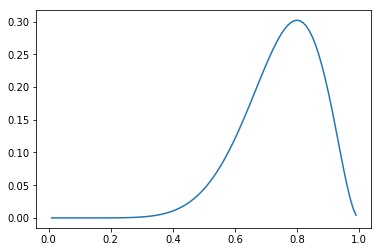

In [11]:
p = np.linspace(0.01, 0.99, 99)
plt.plot(p, binomial.pmf(8, 10, p));

The most likely value of p: 0.8


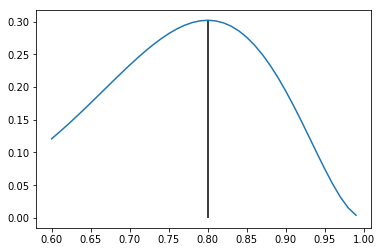

In [12]:
p = np.linspace(0.60, 0.99, 40)
probs = binomial.pmf(8, 10, p)
plt.plot(p, probs)

most_likely_p = p[np.argmax(probs)]
print("The most likely value of p:", most_likely_p)

plt.vlines(x = most_likely_p, ymin = 0, ymax = binomial.pmf(8, 10, most_likely_p));

The graph reaches a clear maximum. This is a value of p at which the observation X = 8 is **MORE LIKELY** than at any other value of p.  

This *maximum likelihood* value of p is our **maximum likelihood estimate (MLE)**.

maximum likelihood estimate (MLE)
------

<center><img src="images/ml1.gif" height="500"/></center>

Check for understanding
------

What is the MLE for these functions?

<center><img src="images/MLE_blank.png" height="500"/></center>

<center><img src="images/MLE-color.png" height="500"/></center>

The Likelihood Function
-----

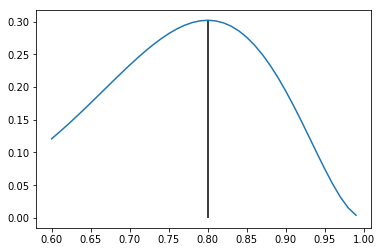

In [14]:
plt.plot(p, probs)
plt.vlines(x = most_likely_p, ymin = 0, ymax = binomial.pmf(8, 10, most_likely_p));

- Horizontal axis: The unknown parameter p.
- Vertical axis: The probability of our observation, X = 8, under each value of p.  
- The function is called the **likelihood function**, a function of the unknown parameter p.   

The likelihood function is:

$$ \begin{align*}
     L(p) &= P(X = 8) \text{ when } X \sim Binomial(10, p) \\
          &= \binom{10}{8} p^8 (1 - p)^{10 - 8} \\
          &= \binom{10}{8} p^8 (1 - p)^2
   \end{align*} $$

In general, if our observation were $X = x$ rather than $X = 8$, the likelihood function is a function of $p$ giving $P(X = x)$ when $X \sim Binomial(100, p)$.

$$ \begin{align*}
     L(p) &= P(X = x) \text{ when } X \sim Binomial(10, p) \\
          &= \binom{10}{x} p^x (1 - p)^{10 - x} 
   \end{align*} $$

Difference between the likelihood function and the probability mass function
-----

The likelihood function gives the probability of a **FIXED** observation x, for every possible value of the parameter p. 

The probability mass function gives the probability of every different value of x, for a **FIXED** value of p.

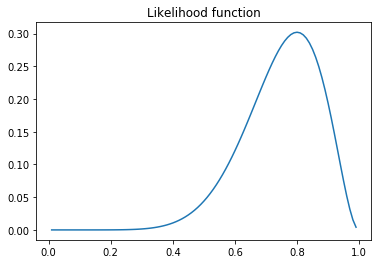

In [19]:
p = np.linspace(0.01, 0.99, 99)
plt.plot(p, binomial.pmf(8, 10, p));
plt.title("Likelihood function");

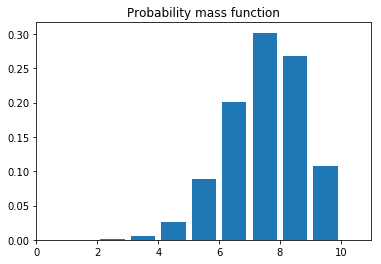

In [18]:
x = np.linspace(0, 10, 11)
plt.bar((x - 0.5), binomial.pmf(x, 10, 0.8))
plt.xlim((0, 11));
plt.title("Probability mass function");

## Maximizing the Likelihood

We have decided that a sensible parameter estimate for p is the maximum likelihood estimate (MLE): the value of $p$ at which the observation X = 8 is more likely than at any other value of p.  

We can find the maximum likelihood estimate (MLE) using calculus.

For computational reasons, we will maximize the log of this function instead.

### The Log-likelihood Function

If we take the natural logarithm of the likelihood function, we get the **log-likelihood** function.  

$$l(p) = \log(L(p))$$

For our coin experiment,

$$ \begin{align*}
     l(p) &= L(p) \\
          &= \log\left( \binom{10}{8} p^8 (1 - p)^2 \right) \\
          &= \log \binom{10}{8} + 8 \log(p) + 2 \log(1 - p)
   \end{align*} $$

Note: The $log \binom{10}{8}$ is usually dropped since it is just a constant and does not affect the value that maximizes the function (we only care about the terms that involve p.

0.8 -1.19736174561


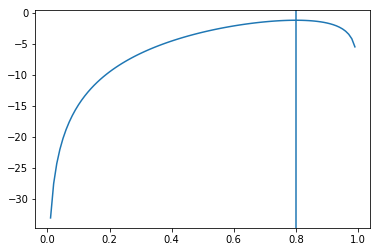

In [20]:
p = np.linspace(0.01, 0.99, 99)
log_likelihoods = np.log(binomial.pmf(8, 10, p))
plt.plot(p, log_likelihoods);

max_index = np.argmax(log_likelihoods)
plt.axvline(x = p[max_index])

print(p[max_index], log_likelihoods[max_index])

Maximize the log-likehood function instead of the likelihood function
------

The logarithm of a function achieves its maximum value at the same points as the function itself.
   
e.g. the p that maximizes the log-likelihood function also maximizes the likelihood, and maximizing either function gives us the same MLE value

Maximize the log-likehood function instead of the likelihood function
------

It is often easier to take the derivative of a log-likelihood function and solving for the parameter being maximized  

i.e. it is easier to work with sums than products

Maximize the log-likehood function instead of the likelihood function
------
<center><img src="https://www.cise.ufl.edu/~mssz/CompOrg/MIPS-SciNotation-ovfl1.gif" height="500"/></center>

One issue with calculating small probabilities with a computer is arithmetic underflow - once the values get sufficiently small, they will be rounded to 0 and we will lose all information.

Check for understanding
------

The likelihood of a hypothesis, L(H|D), the \_\_\_\_\_\_\_\_\_ is fixed and 
\_\_\_\_\_\_\_\_\_ is allowed to vary.

The likelihood of a hypothesis, L(H|D), the __data__ is fixed and 
__hypotheses__ is allowed to vary.


Summary
----

- Do __not__ forget Bayes Theorem
- Statistical inference can be complex but let's K.I.S.S:
    - Maximum likelihood estimation (MLE) of Log-likelihood
- The lab will reinforce the steps of the process

-----
Bonus Material
-----

### Finding the Maximum of the Log-likelihood Function

To find the maximizing value of $p$, we first differentiate the log-likelihood with respect to $p$:

$$ \begin{align*}
     \frac{dl}{dp} &= 8 (\frac{1}{p}) + 2 (\frac{1}{1 - p}) \\
                   &= \frac{8}{p} + \frac{2}{1 - p}
   \end{align*} $$
   
The maximizing value of $p$ occurs when  

$$ \frac{dl}{dp} = 0 $$

This gives us  

$$ \frac{dl}{dp} = \frac{8}{p} - \frac{2}{1 - p} = 0 $$
$$ \Rightarrow p = 0.8 $$

So based on the data we have, we concluded that the probability of getting a head from my coin is 0.8. 


How good is this estimate?  


How to make it better?  

What does the principal of maximum likelihood say?

we should should choose θ so as to make the data as high probability as possible. 

i.e., we should choose θ to maximize L(θ).

<center><img src="images/max.png" style="width: 350px;"/></center>

<br>
<br> 
<br>

----